<a href="https://colab.research.google.com/github/claudiamoses/DataScience-Class-Projects/blob/main/Official_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Scraping text data for all bills

In [ ]:
# links to download all zip files

In [ ]:
#extract house text

from xml.etree import ElementTree as ET
import os
import zipfile
import pandas as pd
import io
import re

# Function to extract text from XML
def extract_text_from_xml(xml_content):
    root = ET.fromstring(xml_content)
    paragraphs = root.findall('.//text')
    return ' '.join(p.text for p in paragraphs if p.text)

# Function to extract bill name from filename
def extract_bill_name_hr(filename):
    # Extract hr number using regular expression
    hr_number = re.search(r'hr(\d+)', filename)
    if hr_number:
        return "H.R." + hr_number.group(1)


# Open the zip file
def fill_hr_df(zip_file_path, sessionNumber):

  # Initialize an empty DataFrame to store data
  data = []
  with zipfile.ZipFile(zip_file_path) as zip_file:
      # Iterate through each file in the zip
      for file_name in zip_file.namelist():
          # Check if the file is an XML file
          if file_name.endswith('.xml'):
              with zip_file.open(file_name) as xml_file:
                  # Read XML content
                  xml_content = xml_file.read()
                  # Extract text from XML
                  text = extract_text_from_xml(xml_content)
                  # Extract bill name from filename
                  bill_name = extract_bill_name_hr(file_name)
                  # Append data to the list
                  data.append({'filename': file_name, 'bill_name': bill_name, 'session': sessionNumber, 'text': text})

  # Convert the list of dictionaries to a DataFrame
  df = pd.DataFrame(data)
  return df

In [ ]:
# create house df
zip_file_path_1_hr = '/content/drive/MyDrive/Datasci project data/BILLS-117-1-hr.zip'
house_bills_df_1 = fill_hr_df(zip_file_path_1_hr, "Session 1")
zip_file_path_2_hr = '/content/drive/MyDrive/Datasci project data/BILLS-117-2-hr.zip'
house_bills_df_2 = fill_hr_df(zip_file_path_2_hr, "Session 2")
house_bills_df = pd.concat([house_bills_df_1, house_bills_df_2])

In [ ]:
#extract senate text
# Function to extract bill name from filename
def extract_bill_name_s(filename):
    # Extracting bill name from the filename
    match = re.search(r'BILLS-\d+s(\d+)[a-zA-Z]*\.xml', filename)
    if match:
        return "S." + match.group(1)
    else:
        return None  # Return None if the pattern is not matched


# Open the zip file
def fill_s_df(zip_file_path, sessionNumber):

  # Initialize an empty DataFrame to store data
  data = []
  with zipfile.ZipFile(zip_file_path) as zip_file:
      # Iterate through each file in the zip
      for file_name in zip_file.namelist():
          # Check if the file is an XML file
          if file_name.endswith('.xml'):
              with zip_file.open(file_name) as xml_file:
                  # Read XML content
                  xml_content = xml_file.read()
                  # Extract text from XML
                  text = extract_text_from_xml(xml_content)
                  # Extract bill name from filename
                  bill_name = extract_bill_name_s(file_name)
                  # Append data to the list
                  data.append({'filename': file_name, 'bill_name': bill_name, 'session': sessionNumber, 'text': text})

  # Convert the list of dictionaries to a DataFrame
  df = pd.DataFrame(data)
  return df

In [ ]:
# create senate df
zip_file_path_1_s = '/content/drive/MyDrive/Datasci project data/BILLS-117-1-s.zip'
senate_bills_df_1 = fill_s_df(zip_file_path_1_s, "Session 1")
zip_file_path_2_s = '/content/drive/MyDrive/Datasci project data/BILLS-117-2-s.zip'
senate_bills_df_2 = fill_s_df(zip_file_path_2_s, "Session 2")
senate_bills_df = pd.concat([senate_bills_df_1, senate_bills_df_2])

In [ ]:
#combine to get all congress bills in one df
congress_bills_df_117 = pd.concat([senate_bills_df, house_bills_df]).reset_index()
congress_bills_df_117

,index,filename,bill_name,session,text
0,0,BILLS-117s12is.xml,S.12,Session 1,Notwithstanding the second sentence of section...
1,1,BILLS-117s11pcs.xml,S.11,Session 1,Notwithstanding the second sentence of section...
2,2,BILLS-117s13pcs.xml,S.13,Session 1,There is established within the Election Assis...
3,3,BILLS-117s12rs.xml,S.12,Session 1,Notwithstanding the second sentence of section...
4,4,BILLS-117s15is.xml,S.15,Session 1,This Act may be cited as the Not later than 3...
...,...,...,...,...,...
18120,4677,BILLS-117hr9692ih.xml,H.R.9692,Session 2,This Act may be cited as the On the date that...
18121,4678,BILLS-117hr9624ih.xml,H.R.9624,Session 2,This Act may be cited as the The table of con...
18122,4679,BILLS-117hr9623ih.xml,H.R.9623,Session 2,This Act may be cited as the The table of con...
18123,4680,BILLS-117hr9673ih.xml,H.R.9673,Session 2,Congress finds the following: Oral history fro...


## Scraping data for bills that passed the 117th congress







In [ ]:
#scrape passed bills for 117th congress for nums
import re

string = '''
PL 117-362 | TXT | PDF (184KB)	S.5329 - A bill to amend the Bill Emerson Good Samaritan Food Donation Act to improve the program, and for other purposes.	01/05/2023
PL 117-361 | TXT | PDF (183KB)	S.5328 - A bill to amend the Farm Security and Rural Investment Act of 2002 to extend terminal lakes assistance.	01/05/2023
PL 117-360 | TXT | PDF (185KB)	S.5168 - Energy Security and Lightering Independence Act of 2022	01/05/2023
PL 117-359 | TXT | PDF (184KB)	S.5087 - A bill to amend the Not Invisible Act of 2019 to extend, and provide additional support for, the activities of the Department of the Interior and the Department of Justice Joint Commission on Reducing Violent Crime Against Indians, and for other purposes.	01/05/2023
PL 117-358 | TXT | PDF (207KB)	S.5066 - Don Young Recognition Act	01/05/2023
PL 117-357 | TXT | PDF (186KB)	S.5016 - Colonel Mary Louise Rasmuson Campus of the Alaska VA Healthcare System Act of 2022	01/05/2023
PL 117-356 | TXT | PDF (183KB)	S.4978 - State Offices of Rural Health Program Reauthorization Act of 2022	01/05/2023
PL 117-355 | TXT | PDF (190KB)	S.4949 - National Cemeteries Preservation and Protection Act of 2022	01/05/2023
PL 117-354 | TXT | PDF (198KB)	S.4926 - Respect for Child Survivors Act	01/05/2023
PL 117-353 | TXT | PDF (186KB)	S.4439 - Katimiîn and Ameekyáaraam Sacred Lands Act	01/05/2023
PL 117-352 | TXT | PDF (183KB)	S.4411 - A bill to designate the facility of the United States Postal Service located at 5302 Galveston Road in Houston, Texas, as the "Vanessa Guillen Post Office Building".	01/05/2023
PL 117-351 | TXT | PDF (185KB)	S.4240 - Justice for Victims of War Crimes Act	01/05/2023
PL 117-350 | TXT | PDF (187KB)	S.4120 - Childhood Cancer STAR Reauthorization Act	01/05/2023
PL 117-349 | TXT | PDF (264KB)	S.4104 - Hualapai Tribe Water Rights Settlement Act of 2022	01/05/2023
PL 117-348 | TXT | PDF (214KB)	S.3949 - Trafficking Victims Prevention and Protection Reauthorization Act of 2022	01/05/2023
PL 117-347 | TXT | PDF (210KB)	S.3946 - Abolish Trafficking Reauthorization Act of 2022	01/05/2023
PL 117-346 | TXT | PDF (183KB)	S.3773 - A bill to authorize leases of up to 99 years for land held in trust for the Confederated Tribes of the Chehalis Reservation.	01/05/2023
PL 117-345 | TXT | PDF (185KB)	S.3519 - Butterfield Overland National Historic Trail Designation Act	01/05/2023
PL 117-344 | TXT | PDF (187KB)	S.3405 - Low Power Protection Act	01/05/2023
PL 117-343 | TXT | PDF (197KB)	S.3308 - Colorado River Indian Tribes Water Resiliency Act of 2022	01/05/2023
PL 117-342 | TXT | PDF (191KB)	S.3168 - A bill to amend the White Mountain Apache Tribe Water Rights Quantification Act of 2010 to modify the enforceability date for certain provisions, and for other purposes.	01/05/2023
PL 117-341 | TXT | PDF (187KB)	S.2834 - Dr. Joanne Smith Memorial Rehabilitation Innovation Centers Act of 2022	01/05/2023
PL 117-340 | TXT | PDF (190KB)	S.2333 - Equal Pay for Team USA Act of 2022	01/05/2023
PL 117-339 | TXT | PDF (219KB)	S.1942 - National Heritage Area Act	01/05/2023
PL 117-338 | TXT | PDF (185KB)	S.1541 - Martha Wright-Reed Just and Reasonable Communications Act of 2022	01/05/2023
PL 117-337 | TXT | PDF (188KB)	S.1402 - Durbin Feeling Native American Languages Act of 2022	01/05/2023
PL 117-336 | TXT | PDF (195KB)	S.1294 - Protecting American Intellectual Property Act of 2022	01/05/2023
PL 117-335 | TXT | PDF (188KB)	S.989 - Native American Language Resource Center Act of 2022	01/05/2023
PL 117-334 | TXT | PDF (188KB)	S.450 - Emmett Till and Mamie Till-Mobley Congressional Gold Medal Act of 2021	01/05/2023
PL 117-333 | TXT | PDF (225KB)	H.R.7939 - Veterans Auto and Education Improvement Act of 2022	01/05/2023
PL 117-332 | TXT | PDF (186KB)	H.R.1917 - Hazard Eligibility and Local Projects Act	01/05/2023
PL 117-331 | TXT | PDF (187KB)	H.R.1154 - Great Dismal Swamp National Heritage Area Act	01/05/2023
PL 117-330 | TXT | PDF (184KB)	H.R.1082 - Sami's Law	01/05/2023
PL 117-329 | TXT | PDF (184KB)	H.R.897 - Agua Caliente Land Exchange Fee to Trust Confirmation Act	01/05/2023
PL 117-328 | TXT | PDF (4MB)	H.R.2617 - Consolidated Appropriations Act, 2023	12/29/2022
PL 117-327 | TXT | PDF (193KB)	S.5230 - Billy's Law	12/27/2022
PL 117-326 | TXT | PDF (186KB)	S.5229 - A bill to direct the Joint Committee of Congress on the Library to remove the bust of Roger Brooke Taney in the Old Supreme Court Chamber of the Capitol and to obtain a bust of Thurgood Marshall for installation in the Capitol or on the Capitol Grounds, and for other purposes.	12/27/2022
PL 117-325 | TXT | PDF (206KB)	S.4003 - Law Enforcement De-Escalation Training Act of 2022	12/27/2022
PL 117-324 | TXT | PDF (185KB)	S.3905 - Preventing Organizational Conflicts of Interest in Federal Acquisition Act	12/27/2022
PL 117-323 | TXT | PDF (186KB)	S.3846 - Justice and Mental Health Collaboration Reauthorization Act of 2022	12/27/2022
PL 117-322 | TXT | PDF (191KB)	S.2991 - Countering Human Trafficking Act of 2021	12/27/2022
PL 117-321 | TXT | PDF (188KB)	S.2899 - Prison Camera Reform Act of 2021	12/27/2022
PL 117-320 | TXT | PDF (190KB)	S.2607 - Iran Hostages Congressional Gold Medal Act	12/27/2022
PL 117-319 | TXT | PDF (185KB)	S.1687 - Small Business Cyber Training Act of 2022	12/27/2022
PL 117-318 | TXT | PDF (187KB)	S.1466 - Saline Lake Ecosystems in the Great Basin States Program Act of 2022	12/27/2022
PL 117-317 | TXT | PDF (184KB)	S.789 - RESPECT Act	12/27/2022
PL 117-316 | TXT | PDF (214KB)	S.558 - FLOODS Act	12/27/2022
PL 117-315 | TXT | PDF (184KB)	S.7 - VAWA Technical Amendment Act of 2022	12/27/2022
PL 117-314 | TXT | PDF (183KB)	H.R.9308 - To designate the facility of the United States Postal Service located at 6401 El Cajon Boulevard in San Diego, California, as the "Susan A. Davis Post Office".	12/27/2022
PL 117-313 | TXT | PDF (189KB)	H.R.8260 - Faster Payments to Veterans' Survivors Act of 2022	12/27/2022
PL 117-312 | TXT | PDF (183KB)	H.R.8226 - To designate the facility of the United States Postal Service located at 236 Concord Exchange North in South Saint Paul, Minnesota, as the "Officer Leo Pavlak Post Office Building".	12/27/2022
PL 117-311 | TXT | PDF (183KB)	H.R.8203 - To designate the facility of the United States Postal Service located at 651 Business Interstate Highway 35 North Suite 420 in New Braunfels, Texas, as the "Bob Krueger Post Office".	12/27/2022
PL 117-310 | TXT | PDF (183KB)	H.R.8026 - To designate the facility of the United States Postal Service located at 825 West 65th Street in Minneapolis, Minnesota, as the "Charles W. Lindberg Post Office".	12/27/2022
PL 117-309 | TXT | PDF (183KB)	H.R.8025 - To designate the facility of the United States Postal Service located at 100 South 1st Street in Minneapolis, Minnesota, as the "Martin Olav Sabo Post Office".	12/27/2022
PL 117-308 | TXT | PDF (185KB)	H.R.7735 - Improving Access to the VA Home Loan Benefit Act of 2022	12/27/2022
PL 117-307 | TXT | PDF (183KB)	H.R.7638 - To designate the facility of the United States Postal Service located at 6000 South Florida Avenue in Lakeland, Florida, as the "U.S. Marine Corporal Ronald R. Payne Jr. Post Office".	12/27/2022
PL 117-306 | TXT | PDF (183KB)	H.R.7519 - To designate the facility of the United States Postal Service located at 2050 South Boulevard in Bloomfield Township, Michigan, as the "Dr. Ezra S. Parke Post Office Building".	12/27/2022
PL 117-305 | TXT | PDF (183KB)	H.R.7518 - To designate the facility of the United States Postal Service located at 23200 John R Road in Hazel Park, Michigan, as the "Roy E. Dickens Post Office".	12/27/2022
PL 117-304 | TXT | PDF (183KB)	H.R.7514 - To designate the facility of the United States Postal Service located at 345 South Main Street in Butler, Pennsylvania, as the "Andrew Gomer Williams Post Office Building".	12/27/2022
PL 117-303 | TXT | PDF (185KB)	H.R.7335 - MST Claims Coordination Act	12/27/2022
PL 117-302 | TXT | PDF (187KB)	H.R.7299 - SVAC Act of 2022	12/27/2022
PL 117-301 | TXT | PDF (184KB)	H.R.7181 - Human Trafficking Prevention Act of 2022	12/27/2022
PL 117-300 | TXT | PDF (187KB)	H.R.6961 - Dignity for MST Survivors Act	12/27/2022
PL 117-299 | TXT | PDF (183KB)	H.R.6917 - To designate the facility of the United States Postal Service located at 301 East Congress Parkway in Crystal Lake, Illinois, as the "Ryan J. Cummings Post Office Building".	12/27/2022
PL 117-298 | TXT | PDF (183KB)	H.R.6630 - To designate the facility of the United States Postal Service located at 1400 N Kraemer Blvd. in Placentia, California, as the "PFC Jang Ho Kim Post Office Building".	12/27/2022
PL 117-297 | TXT | PDF (185KB)	H.R.6604 - Veterans Eligible to Transfer School (VETS) Credit Act	12/27/2022
PL 117-296 | TXT | PDF (183KB)	H.R.6427 - Red River National Wildlife Refuge Boundary Modification Act	12/27/2022
PL 117-295 | TXT | PDF (183KB)	H.R.6386 - To designate the facility of the United States Postal Service located at 450 West Schaumburg Road in Schaumburg, Illinois, as the "Veterans of Iraq and Afghanistan Memorial Post Office Building".	12/27/2022
PL 117-294 | TXT | PDF (183KB)	H.R.6267 - To designate the facility of the United States Postal Service located at 15 Chestnut Street in Suffern, New York, as the "Sergeant Gerald T. 'Jerry' Donnellan Post Office".	12/27/2022
PL 117-293 | TXT | PDF (183KB)	H.R.6221 - To designate the facility of the United States Postal Service located at 155 Main Avenue West in Winsted, Minnesota, as the "James A. Rogers Jr. Post Office".	12/27/2022
PL 117-292 | TXT | PDF (183KB)	H.R.6220 - To designate the facility of the United States Postal Service located at 100 3rd Avenue Northwest in Perham, Minnesota, as the "Charles P. Nord Post Office".	12/27/2022
PL 117-291 | TXT | PDF (183KB)	H.R.6218 - To designate the facility of the United States Postal Service located at 317 Blattner Drive in Avon, Minnesota, as the "W.O.C. Kort Miller Plantenberg Post Office".	12/27/2022
PL 117-290 | TXT | PDF (183KB)	H.R.6080 - To designate the facility of the United States Postal Service located at 5420 Kavanaugh Boulevard in Little Rock, Arkansas, as the "Ronald A. Robinson Post Office".	12/27/2022
PL 117-289 | TXT | PDF (185KB)	H.R.6064 - To direct the Secretary of Veterans Affairs to seek to enter into an agreement with the National Academies of Sciences, Engineering, and Medicine for a review of examinations, furnished by the Secretary, to individuals who submit claims to the Secretary for compensation under chapter 11 of title 38, United States Code, for mental and physical conditions linked to military sexual trauma.	12/27/2022
PL 117-288 | TXT | PDF (183KB)	H.R.6042 - To designate the facility of the United States Postal Service located at 213 William Hilton Parkway in Hilton Head Island, South Carolina, as the "Caesar H. Wright Jr. Post Office Building".	12/27/2022
PL 117-287 | TXT | PDF (184KB)	H.R.5973 - Great Lakes Fish and Wildlife Restoration Reauthorization Act of 2022	12/27/2022
PL 117-286 | TXT | PDF (557KB)	H.R.5961 - To make revisions in title 5, United States Code, as necessary to keep the title current, and to make technical amendments to improve the United States Code.	12/27/2022
PL 117-285 | TXT | PDF (183KB)	H.R.5952 - To designate the facility of the United States Postal Service located at 123 East Main Street, in Vergas, Minnesota, as the "Jon Glawe Post Office".	12/27/2022
PL 117-284 | TXT | PDF (183KB)	H.R.5943 - To designate the outpatient clinic of the Department of Veterans Affairs in Greenville, South Carolina, as the "Lance Corporal Dana Cornell Darnell VA Clinic".	12/27/2022
PL 117-283 | TXT | PDF (183KB)	H.R.5900 - To designate the facility of the United States Postal Service located at 2016 East 1st Street in Los Angeles, California, as the "Marine Corps Reserve PVT Jacob Cruz Post Office".	12/27/2022
PL 117-282 | TXT | PDF (183KB)	H.R.5865 - To designate the facility of the United States Postal Service located at 4110 Bluebonnet Drive in Stafford, Texas, as the "Leonard Scarcella Post Office Building".	12/27/2022
PL 117-281 | TXT | PDF (183KB)	H.R.5794 - To designate the facility of the United States Postal Service located at 850 Walnut Street in McKeesport, Pennsylvania, as the First Sergeant Leonard A. Funk, Jr. Post Office Building.	12/27/2022
PL 117-280 | TXT | PDF (183KB)	H.R.5659 - To designate the facility of the United States Postal Service located at 1961 North C Street in Oxnard, California, as the "John R. Hatcher III Post Office Building".	12/27/2022
PL 117-279 | TXT | PDF (183KB)	H.R.5650 - To designate the facility of the United States Postal Service located at 16605 East Avenue of the Fountains in Fountain Hills, Arizona, as the "Dr. C.T. Wright Post Office Building".	12/27/2022
PL 117-278 | TXT | PDF (183KB)	H.R.5349 - To designate the facility of the United States Postal Service located at 1550 State Road S-38-211 in Orangeburg, South Carolina, as the "J.I. Washington Post Office Building".	12/27/2022
PL 117-277 | TXT | PDF (183KB)	H.R.5271 - To designate the facility of the United States Postal Service located at 2245 Rosa L Parks Boulevard in Nashville, Tennessee, as the "Thelma Harper Post Office Building".	12/27/2022
PL 117-276 | TXT | PDF (183KB)	H.R.4899 - To designate the facility of the United States Postal Service located at 10 Broadway Street West, in Akeley, Minnesota, as the "Neal Kenneth Todd Post Office".	12/27/2022
PL 117-275 | TXT | PDF (185KB)	H.R.4881 - Old Pascua Community Land Acquisition Act	12/27/2022
PL 117-274 | TXT | PDF (183KB)	H.R.4622 - To designate the facility of the United States Postal Service located at 226 North Main Street in Roseville, Ohio, as the Ronald E. Rosser Post Office.	12/27/2022
PL 117-273 | TXT | PDF (183KB)	H.R.4250 - War Crimes Rewards Expansion Act	12/27/2022
PL 117-272 | TXT | PDF (183KB)	H.R.3285 - 21st Century President Act	12/27/2022
PL 117-271 | TXT | PDF (185KB)	H.R.2724 - VA Peer Support Enhancement for MST Survivors Act	12/27/2022
PL 117-270 | TXT | PDF (183KB)	H.R.2473 - To designate the facility of the United States Postal Service located at 275 Penn Avenue in Salem, Ohio, as the "Howard Arthur Tibbs Post Office".	12/27/2022
PL 117-269 | TXT | PDF (183KB)	H.R.2472 - To designate the facility of the United States Postal Service located at 82422 Cadiz Jewett Road in Cadiz, Ohio, as the John Armor Bingham Post Office.	12/27/2022
PL 117-268 | TXT | PDF (183KB)	H.R.1095 - To designate the facility of the United States Postal Service located at 101 South Willowbrook Avenue in Compton, California, as the "PFC James Anderson, Jr., Post Office Building".	12/27/2022
PL 117-267 | TXT | PDF (186KB)	H.R.478 - Blackwater Trading Post Land Transfer Act	12/27/2022
PL 117-266 | TXT | PDF (188KB)	H.R.441 - Don Young Alaska Native Health Care Land Transfers Act of 2022	12/27/2022
PL 117-265 | TXT | PDF (183KB)	H.R.203 - To designate the facility of the United States Postal Service located at 4020 Broadway Street in Houston, Texas, as the Benny C. Martinez Post Office Building.	12/27/2022
PL 117-264 | TXT | PDF (187KB)	H.R.4373 - Further Additional Continuing Appropriations and Extensions Act, 2023	12/23/2022
PL 117-263 | TXT | PDF (4MB)	H.R.7776 - James M. Inhofe National Defense Authorization Act for Fiscal Year 2023	12/23/2022
PL 117-262 | TXT | PDF (183KB)	S.4834 - PROTECT Our Children Act of 2022	12/21/2022
PL 117-261 | TXT | PDF (183KB)	S.314 - Klamath Tribe Judgment Fund Repeal Act	12/21/2022
PL 117-260 | TXT | PDF (190KB)	H.R.7535 - Quantum Computing Cybersecurity Preparedness Act	12/21/2022
PL 117-259 | TXT | PDF (186KB)	H.R.3462 - SBA Cyber Awareness Act	12/21/2022
PL 117-258 | TXT | PDF (214KB)	H.R.2930 - Safeguard Tribal Objects of Patrimony Act of 2021	12/21/2022
PL 117-257 | TXT | PDF (183KB)	H.R.2220 - To amend title 40, United States Code, to modify the treatment of certain bargain-price options to purchase at less than fair market value, and for other purposes.	12/21/2022
PL 117-256 | TXT | PDF (188KB)	H.R.310 - To posthumously award the Congressional Gold Medal, collectively, to Glen Doherty, Tyrone Woods, J. Christopher Stevens, and Sean Smith, in recognition of their contributions to the Nation.	12/21/2022
PL 117-255 | TXT | PDF (193KB)	S.3875 - Community Disaster Resilience Zones Act of 2022	12/20/2022
PL 117-254 | TXT | PDF (186KB)	S.3662 - Preventing PFAS Runoff at Airports Act	12/20/2022
PL 117-253 | TXT | PDF (183KB)	S.3499 - A bill to amend the Post-Katrina Emergency Management Reform Act of 2006 to repeal certain obsolete requirements, and for other purposes.	12/20/2022
PL 117-252 | TXT | PDF (183KB)	S.3115 - POWER 2.0 Act	12/20/2022
PL 117-251 | TXT | PDF (193KB)	S.3092 - FIRE Act	12/20/2022
PL 117-250 | TXT | PDF (185KB)	S.2796 - Rural Opioid Abuse Prevention Act	12/20/2022
PL 117-249 | TXT | PDF (186KB)	S.1617 - Disaster Assistance for Rural Communities Act	12/20/2022
PL 117-248 | TXT | PDF (186KB)	S.231 - PFAS Act	12/20/2022
PL 117-247 | TXT | PDF (184KB)	S.198 - Data Mapping to Save Moms' Lives Act	12/20/2022
PL 117-246 | TXT | PDF (186KB)	H.R.7077 - Empowering the U.S. Fire Administration Act	12/20/2022
PL 117-245 | TXT | PDF (186KB)	H.R.5796 - Patents for Humanity Act of 2022	12/20/2022
PL 117-244 | TXT | PDF (188KB)	H.R.1193 - Cardiovascular Advances in Research and Opportunities Legacy Act	12/20/2022
PL 117-243 | TXT | PDF (189KB)	H.R.263 - Big Cat Public Safety Act	12/20/2022
PL 117-242 | TXT | PDF (185KB)	S.5060 - Paul D. Wellstone Building Act of 2022	12/20/2022
PL 117-241 | TXT | PDF (185KB)	S.4052 - Early Hearing Detection and Intervention Act of 2022	12/20/2022
PL 117-240 | TXT | PDF (183KB)	S.4017 - A bill to designate the United States courthouse located at 111 South Highland Avenue in Jackson, Tennessee, as the "James D. Todd United States Courthouse", and for other purposes.	12/20/2022
PL 117-239 | TXT | PDF (183KB)	S.3825 - A bill to designate the facility of the United States Postal Service located at 3903 Melear Drive in Arlington, Texas, as the "Ron Wright Post Office Building".	12/20/2022
PL 117-238 | TXT | PDF (186KB)	H.R.7925 - To designate the Department of Veterans Affairs community-based outpatient clinic located in Palm Desert, California, as the "Sy Kaplan VA Clinic".	12/20/2022
PL 117-237 | TXT | PDF (186KB)	H.R.7903 - To designate the Department of Veterans Affairs community-based outpatient clinic located in Canton, Michigan, as the "Major General Oliver W. Dillard VA Clinic".	12/20/2022
PL 117-236 | TXT | PDF (186KB)	H.R.6863 - To designate the medical center of the Department of Veterans Affairs in Memphis, Tennessee, as the "Lt. Col. Luke Weathers, Jr. VA Medical Center".	12/20/2022
PL 117-235 | TXT | PDF (186KB)	H.R.6722 - To designate the Department of Veterans Affairs community-based outpatient clinic in French Camp, California, as the "Richard A. Pittman VA Clinic".	12/20/2022
PL 117-234 | TXT | PDF (183KB)	H.R.6614 - To designate the facility of the United States Postal Service located at 4744 Grand River Avenue in Detroit, Michigan, as the "Rosa Louise McCauley Parks Post Office Building".	12/19/2022
PL 117-233 | TXT | PDF (183KB)	H.R.5481 - To name the Department of Veterans Affairs community-based outpatient clinic in Forest City, North Carolina, as the "Master Sergeant Jerry K. Crump VA Clinic".	12/19/2022
PL 117-232 | TXT | PDF (183KB)	H.R.3175 - To designate the facility of the United States Postal Service located at 135 Main Street in Biloxi, Mississippi, as the Robert S. McKeithen Post Office Building.	12/19/2022
PL 117-231 | TXT | PDF (183KB)	H.R.700 - To designate the facility of the United States Postal Service located at 303 East Mississippi Avenue in Elwood, Illinois, as the "Lawrence M. 'Larry' Walsh Sr. Post Office".	12/19/2022
PL 117-230 | TXT | PDF (183KB)	H.R.228 - To designate the facility of the United States Postal Service located at 2141 Ferry Street in Anderson, California, as the "Norma Comnick Post Office Building".	12/19/2022
PL 117-229 | TXT | PDF (200KB)	H.R.1437 - Further Continuing Appropriations and Extensions Act, 2023	12/16/2022
PL 117-228 | TXT | PDF (188KB)	H.R.8404 - Respect for Marriage Act	12/13/2022
PL 117-227 | TXT | PDF (185KB)	S.4359 - Senator Johnny Isakson VA Regional Office Act of 2022	12/09/2022
PL 117-226 | TXT | PDF (187KB)	S.3369 - Max Cleland VA Medical Center Act	12/09/2022
PL 117-225 | TXT | PDF (196KB)	H.R.521 - First Responder Fair RETIRE Act	12/09/2022
PL 117-224 | TXT | PDF (188KB)	S.4524 - Speak Out Act	12/07/2022
PL 117-223 | TXT | PDF (204KB)	H.R.7132 - Safe Connections Act of 2022	12/07/2022
PL 117-222 | TXT | PDF (183KB)	S.3655 - Civil Rights Cold Case Investigations Support Act of 2022	12/05/2022
PL 117-221 | TXT | PDF (185KB)	S.3510 - Disaster Resiliency Planning Act	12/05/2022
PL 117-220 | TXT | PDF (183KB)	S.2159 - A bill to designate the community-based outpatient clinic of the Department of Veterans Affairs located at 400 College Drive, Middleburg, Florida, as the "Andrew K. Baker Department of Veterans Affairs Clinic", and for other purposes.	12/05/2022
PL 117-219 | TXT | PDF (191KB)	S.1941 - MAPS Act of 2021	12/05/2022
PL 117-218 | TXT | PDF (183KB)	S.3884 - A bill to designate the facility of the United States Postal Service located at 404 U.S. Highway 41 North in Baraga, Michigan, as the "Cora Reynolds Anderson Post Office".	12/02/2022
PL 117-217 | TXT | PDF (183KB)	S.3826 - A bill to designate the facility of the United States Postal Service located at 1304 4th Avenue in Canyon, Texas, as the "Gary James Fletcher Post Office Building".	12/02/2022
PL 117-216 | TXT | PDF (185KB)	H.J.Res.100 - To provide for a resolution with respect to the unresolved disputes between certain railroads represented by the National Carriers' Conference Committee of the National Railway Labor Conference and certain of their employees.	12/02/2022
PL 117-215 | TXT | PDF (202KB)	H.R.8454 - Medical Marijuana and Cannabidiol Research Expansion Act	12/02/2022
PL 117-214 | TXT | PDF (193KB)	H.R.4693 - Global Malnutrition Prevention and Treatment Act of 2021	10/19/2022
PL 117-213 | TXT | PDF (183KB)	S.4791 - A bill to amend section 301 of title 44, United States Code, to establish a term for the appointment of the Director of the Government Publishing Office.	10/17/2022
PL 117-212 | TXT | PDF (185KB)	S.4205 - PAW Act	10/17/2022
PL 117-211 | TXT | PDF (184KB)	S.3470 - End Human Trafficking in Government Contracts Act of 2022	10/17/2022
PL 117-210 | TXT | PDF (187KB)	S.3157 - Bridging the Gap for New Americans Act	10/17/2022
PL 117-209 | TXT | PDF (184KB)	S.2794 - Supporting Families of the Fallen Act	10/17/2022
PL 117-208 | TXT | PDF (185KB)	S.2771 - A bill to designate the community-based outpatient clinic of the Department of Veterans Affairs in San Angelo, Texas, as the "Colonel Charles and JoAnne Powell Department of Veterans Affairs Clinic".	10/17/2022
PL 117-207 | TXT | PDF (187KB)	S.2551 - AI Training Act	10/17/2022
PL 117-206 | TXT | PDF (188KB)	S.2490 - Blackwell School National Historic Site Act	10/17/2022
PL 117-205 | TXT | PDF (188KB)	S.1198 - Solid Start Act of 2022	10/17/2022
PL 117-204 | TXT | PDF (184KB)	S.958 - Maximizing Outcomes through Better Investments in Lifesaving Equipment for (MOBILE) Health Care Act	10/17/2022
PL 117-203 | TXT | PDF (191KB)	S.516 - Advanced Air Mobility Coordination and Leadership Act	10/17/2022
PL 117-202 | TXT | PDF (188KB)	S.442 - BRIGHT Act	10/17/2022
PL 117-201 | TXT | PDF (184KB)	S.169 - ARTS Act	10/17/2022
PL 117-200 | TXT | PDF (187KB)	S.1098 - Joint Consolidation Loan Separation Act	10/11/2022
PL 117-199 | TXT | PDF (185KB)	H.R.7698 - To designate the outpatient clinic of the Department of Veterans Affairs in Ventura, California, as the "Captain Rosemary Bryant Mariner Outpatient Clinic".	10/11/2022
PL 117-198 | TXT | PDF (183KB)	H.R.5809 - To designate the facility of the United States Postal Service located at 1801 Town and Country Drive in Norco, California, as the "Lance Corporal Kareem Nikoui Memorial Post Office Building".	10/11/2022
PL 117-197 | TXT | PDF (183KB)	H.R.3539 - To designate the facility of the United States Postal Service located at 223 West Chalan Santo Papa in Hagatna, Guam, as the "Atanasio Taitano Perez Post Office".	10/11/2022
PL 117-196 | TXT | PDF (183KB)	H.R.3508 - To designate the facility of the United States Postal Service located at 39 West Main Street, in Honeoye Falls, New York, as the "CW4 Christian J. Koch Memorial Post Office".	10/11/2022
PL 117-195 | TXT | PDF (183KB)	H.R.2142 - To designate the facility of the United States Postal Service located at 170 Manhattan Avenue in Buffalo, New York, as the "Indiana Hunt-Martin Post Office Building".	10/11/2022
PL 117-194 | TXT | PDF (183KB)	H.R.92 - To designate the facility of the United States Postal Service located at 110 Johnson Street in Pickens, South Carolina, as the "Specialist Four Charles Johnson Post Office".	10/11/2022
PL 117-193 | TXT | PDF (183KB)	H.R.91 - To designate the facility of the United States Postal Service located at 810 South Pendleton Street in Easley, South Carolina, as the "Private First Class Barrett Lyle Austin Post Office Building".	10/11/2022
PL 117-192 | TXT | PDF (185KB)	H.R.8982 - Bulk Infant Formula to Retail Shelves Act	10/10/2022
PL 117-191 | TXT | PDF (185KB)	H.R.7846 - Veterans' Compensation Cost-of-Living Adjustment Act of 2022	10/10/2022
PL 117-190 | TXT | PDF (185KB)	H.R.7500 - Fiscal Year 2022 Veterans Affairs Major Medical Facility Authorization Act	10/10/2022
PL 117-189 | TXT | PDF (184KB)	H.R.5641 - Small Project Efficient and Effective Disaster Recovery Act	10/10/2022
PL 117-188 | TXT | PDF (184KB)	H.R.4877 - One Stop Shop for Small Business Compliance Act of 2021	10/10/2022
PL 117-187 | TXT | PDF (185KB)	H.R.1766 - FTC Collaboration Act of 2021	10/10/2022
PL 117-186 | TXT | PDF (185KB)	H.R.468 - Expedited Delivery of Airport Infrastructure Act of 2021	10/10/2022
PL 117-185 | TXT | PDF (185KB)	H.R.6899 - Russia and Belarus SDR Exchange Prohibition Act of 2022	10/04/2022
PL 117-184 | TXT | PDF (183KB)	H.R.5577 - To designate the facility of the United States Postal Service located at 3900 Crown Road Southwest in Atlanta, Georgia, as the "John R. Lewis Post Office Building".	10/04/2022
PL 117-183 | TXT | PDF (217KB)	S.4900 - SBIR and STTR Extension Act of 2022	09/30/2022
PL 117-182 | TXT | PDF (185KB)	S.3969 - Protection and Advocacy for Voting Access Program Inclusion Act	09/30/2022
PL 117-181 | TXT | PDF (183KB)	S.3895 - United States Commission on International Religious Freedom Reauthorization Act of 2022	09/30/2022
PL 117-180 | TXT | PDF (323KB)	H.R.6833 - Continuing Appropriations and Ukraine Supplemental Appropriations Act, 2023	09/30/2022
PL 117-179 | TXT | PDF (185KB)	H.R.8656 - To designate the clinic of the Department of Veterans Affairs in Mishawaka, Indiana, as the "Jackie Walorski VA Clinic".	09/30/2022
PL 117-178 | TXT | PDF (186KB)	S.2293 - CREW Act	09/29/2022
PL 117-177 | TXT | PDF (183KB)	S.4785 - A bill to extend by 19 days the authorization for the special assessment for the Domestic Trafficking Victims' Fund.	09/16/2022
PL 117-176 | TXT | PDF (183KB)	S.3103 - Eliminating Limits to Justice for Child Sex Abuse Victims Act of 2022	09/16/2022
PL 117-175 | TXT | PDF (183KB)	H.R.5754 - Patient Advocate Tracker Act	09/16/2022
PL 117-174 | TXT | PDF (187KB)	S.4458 - Ensuring the Best Schools for Veterans Act of 2022	08/26/2022
PL 117-173 | TXT | PDF (183KB)	S.3451 - A bill to include certain computer-related projects in the Federal permitting program under title XLI of the FAST Act, and for other purposes.	08/16/2022
PL 117-172 | TXT | PDF (192KB)	H.R.6943 - Public Safety Officer Support Act of 2022	08/16/2022
PL 117-171 | TXT | PDF (191KB)	H.R.5313 - Reese's Law	08/16/2022
PL 117-170 | TXT | PDF (188KB)	H.R.2992 - Traumatic Brain Injury and Post-Traumatic Stress Disorder Law Enforcement Training Act	08/16/2022
PL 117-169 | TXT | PDF (844KB)	H.R.5376 - Inflation Reduction Act of 2022	08/16/2022
PL 117-168 | TXT | PDF (323KB)	S.3373 - Sergeant First Class Heath Robinson Honoring our Promise to Address Comprehensive Toxics Act of 2022	08/10/2022
PL 117-167 | TXT | PDF (1MB)	H.R.4346 - Chips and Science Act	08/09/2022
PL 117-166 | TXT | PDF (184KB)	H.R.7352 - PPP and Bank Fraud Enforcement Harmonization Act of 2022	08/05/2022
PL 117-165 | TXT | PDF (210KB)	H.R.7334 - COVID-19 EIDL Fraud Statute of Limitations Act of 2022	08/05/2022
PL 117-164 | TXT | PDF (193KB)	H.R.3359 - Homicide Victims' Families' Rights Act of 2021	08/03/2022
PL 117-163 | TXT | PDF (192KB)	H.R.1842 - Harriet Tubman Bicentennial Commemorative Coin Act	08/03/2022
PL 117-162 | TXT | PDF (190KB)	H.R.1057 - Greatest Generation Commemorative Coin Act	08/03/2022
PL 117-161 | TXT | PDF (185KB)	S.144 - Desert Sage Youth Wellness Center Access Improvement Act	07/29/2022
PL 117-160 | TXT | PDF (185KB)	H.R.8351 - Formula Act	07/21/2022
PL 117-159 | TXT | PDF (257KB)	S.2938 - Bipartisan Safer Communities Act	06/25/2022
PL 117-158 | TXT | PDF (190KB)	S.2089 - Keep Kids Fed Act of 2022	06/25/2022
PL 117-157 | TXT | PDF (183KB)	H.R.1444 - To designate the facility of the United States Postal Service located at 132 North Loudoun Street, Suite 1 in Winchester, Virginia, as the Patsy Cline Post Office.	06/24/2022
PL 117-156 | TXT | PDF (183KB)	H.R.767 - To designate the facility of the United States Postal Service located at 40 Fulton Street in Middletown, New York, as the "Benjamin A. Gilman Post Office Building".	06/24/2022
PL 117-155 | TXT | PDF (183KB)	H.R.735 - To designate the facility of the United States Postal Service located at 502 East Cotati Avenue in Cotati, California, as the "Arturo L. Ibleto Post Office Building".	06/24/2022
PL 117-154 | TXT | PDF (187KB)	H.R.4591 - VA Electronic Health Record Transparency Act of 2021	06/23/2022
PL 117-153 | TXT | PDF (183KB)	H.R.2324 - To designate the facility of the United States Postal Service located at 2800 South Adams Street in Tallahassee, Florida, as the "D. Edwina Stephens Post Office".	06/23/2022
PL 117-152 | TXT | PDF (184KB)	H.R.1170 - To designate the facility of the United States Postal Service located at 1 League in Irvine, California, as the "Tuskegee Airman Lieutenant Colonel Robert J. Friend Memorial Post Office Building".	06/23/2022
PL 117-151 | TXT | PDF (189KB)	S.3823 - Bankruptcy Threshold Adjustment and Technical Corrections Act	06/21/2022
PL 117-150 | TXT | PDF (187KB)	S.2520 - State and Local Government Cybersecurity Act of 2021	06/21/2022
PL 117-149 | TXT | PDF (193KB)	S.1097 - Federal Rotational Cyber Workforce Program Act of 2021	06/21/2022
PL 117-148 | TXT | PDF (184KB)	S.4160 - Supreme Court Police Parity Act of 2022	06/16/2022
PL 117-147 | TXT | PDF (183KB)	H.R.3613 - To designate the facility of the United States Postal Service located at 202 Trumbull Street in Saint Clair, Michigan, as the "Corporal Jeffrey Robert Standfest Post Office Building".	06/16/2022
PL 117-146 | TXT | PDF (219KB)	S.3580 - Ocean Shipping Reform Act of 2022	06/16/2022
PL 117-145 | TXT | PDF (187KB)	S.2201 - Supply Chain Security Training Act of 2021	06/16/2022
PL 117-144 | TXT | PDF (189KB)	S.66 - South Florida Clean Coastal Waters Act of 2021	06/16/2022
PL 117-143 | TXT | PDF (184KB)	H.R.1298 - To designate the facility of the United States Postal Service located at 1233 North Cedar Street in Owasso, Oklahoma, as the "Technical Sergeant Marshal Roberts Post Office Building".	06/16/2022
PL 117-142 | TXT | PDF (183KB)	H.R.4168 - To designate the facility of the United States Postal Service located at 6223 Maple Street, in Omaha, Nebraska, as the "Petty Officer 1st Class Charles Jackson French Post Office".	06/15/2022
PL 117-141 | TXT | PDF (183KB)	H.R.3579 - To designate the facility of the United States Postal Service located at 200 East Main Street in Maroa, Illinois, as the "Jeremy L. Ridlen Post Office".	06/15/2022
PL 117-140 | TXT | PDF (191KB)	H.R.3525 - Commission To Study the Potential Creation of a National Museum of Asian Pacific American History and Culture Act	06/13/2022
PL 117-139 | TXT | PDF (184KB)	S.4119 - RECA Extension Act of 2022	06/07/2022
PL 117-138 | TXT | PDF (186KB)	S.4089 - Veterans Rapid Retraining Assistance Program Restoration and Recovery Act of 2022	06/07/2022
PL 117-137 | TXT | PDF (186KB)	S.3527 - A bill to amend title 38, United States Code, to authorize the Secretary of Veterans Affairs to transfer the name of property of the Department of Veterans Affairs designated by law to other property of the Department.	06/07/2022
PL 117-136 | TXT | PDF (187KB)	S.2687 - Strengthening Oversight for Veterans Act of 2021	06/07/2022
PL 117-135 | TXT | PDF (198KB)	S.2533 - Making Advances in Mammography and Medical Options for Veterans Act	06/07/2022
PL 117-134 | TXT | PDF (187KB)	S.2514 - A bill to rename the Provo Veterans Center in Orem, Utah, as the "Col. Gail S. Halvorsen 'Candy Bomber' Veterans Center".	06/07/2022
PL 117-133 | TXT | PDF (188KB)	S.2102 - Dr. Kate Hendricks Thomas SERVICE Act	06/07/2022
PL 117-132 | TXT | PDF (195KB)	S.1872 - United States Army Rangers Veterans of World War II Congressional Gold Medal Act	06/07/2022
PL 117-131 | TXT | PDF (184KB)	S.1760 - A bill to designate the community-based outpatient clinic of the Department of Veterans Affairs planned to be built in Oahu, Hawaii, as the "Daniel Kahikina Akaka Department of Veterans Affairs Community-Based Outpatient Clinic".	06/07/2022
PL 117-130 | TXT | PDF (168KB)	H.R.4426 - Homeland Security for Children Act	06/06/2022
PL 117-129 | TXT | PDF (189KB)	H.R.7791 - Access to Baby Formula Act of 2022	05/21/2022
PL 117-128 | TXT | PDF (192KB)	H.R.7691 - Additional Ukraine Supplemental Appropriations Act, 2022	05/21/2022
PL 117-127 | TXT | PDF (185KB)	H.R.6023 - Multinational Species Conservation Funds Semipostal Stamp Reauthorization Act of 2021	05/16/2022
PL 117-126 | TXT | PDF (185KB)	H.R.3182 - Safe Sleep for Babies Act of 2021	05/16/2022
PL 117-125 | TXT | PDF (187KB)	S.3059 - Courthouse Ethics and Transparency Act	05/13/2022
PL 117-124 | TXT | PDF (189KB)	S.812 - A bill to direct the Secretary of State to develop a strategy to regain observer status for Taiwan in the World Health Organization, and for other purposes.	05/13/2022
PL 117-123 | TXT | PDF (195KB)	S.270 - Brown v. Board of Education National Historical Park Expansion and Redesignation Act	05/12/2022
PL 117-122 | TXT | PDF (188KB)	S.658 - National Cybersecurity Preparedness Consortium Act of 2021	05/12/2022
PL 117-121 | TXT | PDF (193KB)	S.497 - American Fisheries Advisory Committee Act	05/12/2022
PL 117-120 | TXT | PDF (184KB)	S.2126 - A bill to designate the Federal Office Building located at 308 W. 21st Street in Cheyenne, Wyoming, as the "Louisa Swain Federal Office Building", and for other purposes.	05/10/2022
PL 117-119 | TXT | PDF (184KB)	S.1226 - A bill to designate the United States courthouse located at 1501 North 6th Street in Harrisburg, Pennsylvania, as the "Sylvia H. Rambo United States Courthouse", and for other purposes.	05/10/2022
PL 117-118 | TXT | PDF (186KB)	S.3522 - Ukraine Democracy Defense Lend-Lease Act of 2022	05/09/2022
PL 117-117 | TXT | PDF (184KB)	S.400 - William T. Coleman, Jr. and Norman Y. Mineta Department of Transportation Headquarters Act	05/06/2022
PL 117-116 | TXT | PDF (188KB)	S.2629 - Better Cybercrime Metrics Act	05/05/2022
PL 117-115 | TXT | PDF (185KB)	S.233 - Donna M. Doss Memorial Act of 2021	05/05/2022
PL 117-114 | TXT | PDF (189KB)	H.R.3113 - Modernizing Access to Our Public Land Act	04/29/2022
PL 117-113 | TXT | PDF (187KB)	H.R.5681 - Shadow Wolves Enhancement Act	04/19/2022
PL 117-112 | TXT | PDF (186KB)	H.R.3197 - Save the Liberty Theatre Act of 2021	04/19/2022
PL 117-111 | TXT | PDF (194KB)	S.3294 - A bill to obtain and direct the placement in the Capitol or on the Capitol Grounds of a statue to honor Associate Justice of the Supreme Court of the United States Sandra Day O'Connor and a statue to honor Associate Justice of the Supreme Court of the United States Ruth Bader Ginsburg.	04/13/2022
PL 117-110 | TXT | PDF (211KB)	H.R.7108 - Suspending Normal Trade Relations with Russia and Belarus Act	04/08/2022
PL 117-109 | TXT | PDF (206KB)	H.R.6968 - Ending Importation of Russian Oil Act	04/08/2022
PL 117-108 | TXT | PDF (248KB)	H.R.3076 - Postal Service Reform Act of 2022	04/06/2022
PL 117-107 | TXT | PDF (187KB)	H.R.55 - Emmett Till Antilynching Act	03/29/2022
PL 117-106 | TXT | PDF (191KB)	H.R.2497 - Amache National Historic Site Act	03/18/2022
PL 117-105 | TXT | PDF (192KB)	H.R.1667 - Dr. Lorna Breen Health Care Provider Protection Act	03/18/2022
PL 117-104 | TXT | PDF (185KB)	H.R.189 - John Lewis NIMHD Research Endowment Revitalization Act of 2021	03/18/2022
PL 117-103 | TXT | PDF (3MB)	H.R.2471 - Consolidated Appropriations Act, 2022	03/15/2022
PL 117-102 | TXT | PDF (185KB)	S.3706 - A bill to provide for the application of certain provisions of the Secure Rural Schools and Community Self-Determination Act of 2000 for fiscal year 2021.	03/15/2022
PL 117-101 | TXT | PDF (186KB)	S.1662 - Supporting the Foundation for the National Institutes of Health and the Reagan-Udall Foundation for the Food and Drug Administration Act	03/15/2022
PL 117-100 | TXT | PDF (190KB)	S.1543 - STANDUP Act of 2021	03/15/2022
PL 117-99 | TXT | PDF (185KB)	S.854 - Methamphetamine Response Act of 2021	03/14/2022
PL 117-98 | TXT | PDF (190KB)	H.R.3665 - To designate the medical center of the Department of Veterans Affairs in San Diego, California, as the Jennifer Moreno Department of Veterans Affairs Medical Center, and to support the designation of a component of such medical center in honor of Kathleen Bruyere.	03/14/2022
PL 117-97 | TXT | PDF (192KB)	S.321 - "Six Triple Eight" Congressional Gold Medal Act of 2021	03/14/2022
PL 117-96 | TXT | PDF (186KB)	H.R.2545 - To amend title 38, United States Code, to clarify the role of doctors of podiatric medicine in the Department of Veterans Affairs, and for other purposes.	03/14/2022
PL 117-95 | TXT | PDF (185KB)	H.J.Res.75 - Extension of Continuing Appropriations Act, 2022	03/11/2022
PL 117-94 | TXT | PDF (185KB)	H.R.3419 - To designate the facility of the United States Postal Service located at 66 Meserole Avenue in Brooklyn, New York, as the Joseph R. Lentol Post Office.	03/11/2022
PL 117-93 | TXT | PDF (185KB)	H.R.960 - To designate the facility of the United States Postal Service located at 3493 Burnet Avenue in Cincinnati, Ohio, as the John H. Leahr and Herbert M. Heilbrun Post Office.	03/11/2022
PL 117-92 | TXT | PDF (185KB)	H.R.3210 - To designate the facility of the United States Postal Service located at 1905 15th Street in Boulder, Colorado, as the "Officer Eric H. Talley Post Office Building".	03/10/2022
PL 117-91 | TXT | PDF (185KB)	H.R.2044 - To designate the facility of the United States Postal Service located at 17 East Main Street in Herington, Kansas, as the Captain Emil J. Kapaun Post Office Building.	03/10/2022
PL 117-90 | TXT | PDF (190KB)	H.R.4445 - Ending Forced Arbitration of Sexual Assault and Sexual Harassment Act of 2021	03/03/2022
PL 117-89 | TXT | PDF (185KB)	H.R.1281 - To name the Department of Veterans Affairs community-based outpatient clinic in Gaylord, Michigan, as the Navy Corpsman Steve Andrews Department of Veterans Affairs Health Care Clinic.	02/23/2022
PL 117-88 | TXT | PDF (195KB)	S.583 - PRICE Act of 2021	02/22/2022
PL 117-87 | TXT | PDF (185KB)	S.566 - A bill to designate the facility of the United States Postal Service located at 42 Main Street in Slatersville, Rhode Island, as the "Specialist Matthew R. Turcotte Post Office".	02/22/2022
PL 117-86 | TXT | PDF (192KB)	H.R.6617 - Further Additional Extending Government Funding Act	02/18/2022
PL 117-85 | TXT | PDF (192KB)	S.1404 - Ghost Army Congressional Gold Medal Act	02/01/2022
PL 117-84 | TXT | PDF (191KB)	S.452 - Willie O'Ree Congressional Gold Medal Act	01/31/2022
PL 117-83 | TXT | PDF (186KB)	S.2959 - Supplemental Impact Aid Flexibility Act	01/21/2022
PL 117-82 | TXT | PDF (189KB)	H.R.1192 - PRRADA	01/20/2022
PL 117-81 | TXT | PDF (2MB)	S.1605 - National Defense Authorization Act for Fiscal Year 2022	12/27/2021
PL 117-80 | TXT | PDF (187KB)	H.R.1664 - To authorize the National Medal of Honor Museum Foundation to establish a commemorative work in the District of Columbia and its environs, and for other purposes.	12/27/2021
PL 117-79 | TXT | PDF (196KB)	H.R.3537 - Accelerating Access to Critical Therapies for ALS Act	12/23/2021
PL 117-78 | TXT | PDF (202KB)	H.R.6256 - To ensure that goods made with forced labor in the Xinjiang Uyghur Autonomous Region of the People’s Republic of China do not enter the United States market, and for other purposes.	12/23/2021
PL 117-77 | TXT | PDF (189KB)	S.3377 - Capitol Police Emergency Assistance Act of 2021	12/22/2021
PL 117-76 | TXT | PDF (195KB)	H.R.5545 - REMOTE Act	12/21/2021
PL 117-75 | TXT | PDF (185KB)	H.R.4660 - To designate the Federal Building and United States Courthouse located at 1125 Chapline Street in Wheeling, West Virginia, as the "Frederick P. Stamp, Jr. Federal Building and United States Courthouse".	12/21/2021
PL 117-74 | TXT | PDF (185KB)	H.R.390 - To redesignate the Federal building located at 167 North Main Street in Memphis, Tennessee as the "Odell Horton Federal Building".	12/21/2021
PL 117-73 | TXT | PDF (165KB)	S.J.Res.33 - A joint resolution joint resolution relating to increasing the debt limit.	12/16/2021
PL 117-72 | TXT | PDF (189KB)	H.R.5142 - To award posthumously a Congressional Gold Medal, in commemoration to the servicemembers who perished in Afghanistan on August 26, 2021, during the evacuation of citizens of the United States and Afghan allies at Hamid Karzai International Airport, and for other purposes.	12/16/2021
PL 117-71 | TXT | PDF (207KB)	S.610 - Protecting Medicare and American Farmers from Sequester Cuts Act	12/10/2021
PL 117-70 | TXT | PDF (198KB)	H.R.6119 - Further Extending Government Funding Act	12/03/2021
PL 117-69 | TXT | PDF (192KB)	S.796 - Protecting Moms Who Served Act of 2021	11/30/2021
PL 117-68 | TXT | PDF (187KB)	S.1095 - Colonel John M. McHugh Tuition Fairness for Survivors Act of 2021	11/30/2021
PL 117-67 | TXT | PDF (188KB)	S.894 - Hire Veteran Health Heroes Act of 2021	11/30/2021
PL 117-66 | TXT | PDF (186KB)	S.1031 - A bill to require the Comptroller General of the United States to conduct a study on disparities associated with race and ethnicity with respect to certain benefits administered by the Secretary of Veterans Affairs, and for other purposes.	11/30/2021
PL 117-65 | TXT | PDF (186KB)	S.108 - A bill to authorize the Seminole Tribe of Florida to lease or transfer certain land, and for other purposes.	11/23/2021
PL 117-64 | TXT | PDF (187KB)	H.R.1510 - To direct the Secretary of Veterans Affairs to submit to Congress a report on the use of cameras in medical facilities of the Department of Veterans Affairs.	11/23/2021
PL 117-63 | TXT | PDF (188KB)	H.R.2911 - VA Transparency & Trust Act of 2021	11/22/2021
PL 117-62 | TXT | PDF (187KB)	H.R.2093 - Veterans and Family Information Act	11/22/2021
PL 117-61 | TXT | PDF (201KB)	S.1511 - Protecting America's First Responders Act of 2021	11/18/2021
PL 117-60 | TXT | PDF (192KB)	S.1502 - COPS Counseling Act	11/18/2021
PL 117-59 | TXT | PDF (187KB)	S.921 - Jaime Zapata and Victor Avila Federal Officers and Employees Protection Act	11/18/2021
PL 117-58 | TXT | PDF (3MB)	H.R.3684 - Infrastructure Investment and Jobs Act	11/15/2021
PL 117-57 | TXT | PDF (187KB)	H.R.4172 - To name the Department of Veterans Affairs community-based outpatient clinic in Aurora, Colorado, as the Lieutenant Colonel John W. Mosley VA Clinic.	11/12/2021
PL 117-56 | TXT | PDF (188KB)	H.R.3475 - To name the Department of Veterans Affairs community-based outpatient clinic in Columbus, Georgia, as the Robert S. Poydasheff VA Clinic.	11/12/2021
PL 117-55 | TXT | PDF (187KB)	H.R.3919 - Secure Equipment Act of 2021	11/11/2021
PL 117-54 | TXT | PDF (206KB)	S.1064 - RENACER Act	11/10/2021
PL 117-53 | TXT | PDF (187KB)	H.R.1899 - Ensuring Compliance Against Drug Diversion Act of 2021	11/10/2021
PL 117-52 | TXT | PDF (188KB)	H.R.5763 - Further Surface Transportation Extension Act of 2021	10/31/2021
PL 117-51 | TXT | PDF (185KB)	H.R.4981 - To amend the Fentanyl Sanctions Act, to modify certain deadlines relating to the Commission on Combating Synthetic Opioid Trafficking.	10/19/2021
PL 117-50 | TXT | PDF (186KB)	S.1301 - Promoting Physical Activity for Americans Act	10/14/2021
PL 117-49 | TXT | PDF (195KB)	S.848 - Consider Teachers Act of 2021	10/13/2021
PL 117-48 | TXT | PDF (188KB)	H.R.2278 - To designate the September 11th National Memorial Trail Route, and for other purposes.	10/13/2021
PL 117-47 | TXT | PDF (190KB)	S.1917 - K-12 Cybersecurity Act of 2021	10/08/2021
PL 117-46 | TXT | PDF (198KB)	S.1828 - HAVANA Act of 2021	10/08/2021
PL 117-45 | TXT | PDF (188KB)	S.189 - Veterans' Compensation Cost-of-Living Adjustment Act of 2021	10/08/2021
PL 117-44 | TXT | PDF (198KB)	H.R.5434 - Surface Transportation Extension Act of 2021	10/02/2021
PL 117-43 | TXT | PDF (272KB)	H.R.5305 - Extending Government Funding and Delivering Emergency Assistance Act	09/30/2021
PL 117-42 | TXT | PDF (187KB)	H.R.5293 - Department of Veterans Affairs Expiring Authorities Act of 2021	09/30/2021
PL 117-41 | TXT | PDF (186KB)	S.325 - A bill to amend the Alyce Spotted Bear and Walter Soboleff Commission on Native Children Act to extend the deadline for a report by the Alyce Spotted Bear and Walter Soboleff Commission on Native Children, and for other purposes.	09/24/2021
PL 117-40 | TXT | PDF (192KB)	S.272 - Congressional Budget Justification Transparency Act of 2021	09/24/2021
PL 117-39 | TXT | PDF (186KB)	H.R.5085 - Emergency Repatriation Assistance for Returning Americans Act	08/31/2021
PL 117-38 | TXT | PDF (191KB)	H.R.3642 - Harlem Hellfighters Congressional Gold Medal Act	08/25/2021
PL 117-37 | TXT | PDF (193KB)	H.R.1448 - PAWS for Veterans Therapy Act	08/25/2021
PL 117-36 | TXT | PDF (186KB)	H.R.1002 - DEBAR Act of 2021	08/06/2021
PL 117-35 | TXT | PDF (186KB)	H.R.772 - To designate the facility of the United States Postal Service located at 229 Minnetonka Avenue South in Wayzata, Minnesota, as the Jim Ramstad Post Office.	08/06/2021
PL 117-34 | TXT | PDF (186KB)	H.R.264 - To designate the facility of the United States Postal Service located at 1101 Charlotte Street in Georgetown, South Carolina, as the "Joseph Hayne Rainey Memorial Post Office Building".	08/06/2021
PL 117-33 | TXT | PDF (186KB)	H.R.208 - To designate the facility of the United States Postal Service located at 500 West Main Street, Suite 102 in Tupelo, Mississippi, as the Colonel Carlyle Smitty Harris Post Office.	08/06/2021
PL 117-32 | TXT | PDF (191KB)	H.R.3325 - To award four congressional gold medals to the United States Capitol Police and those who protected the U.S. Capitol on January 6, 2021.	08/05/2021
PL 117-31 | TXT | PDF (194KB)	H.R.3237 - Emergency Security Supplemental Appropriations Act, 2021	07/30/2021
PL 117-30 | TXT | PDF (203KB)	S.1910 - Major Medical Facility Authorization Act of 2021	07/29/2021
PL 117-29 | TXT | PDF (202KB)	S.957 - DUMP Opioids Act	07/29/2021
PL 117-28 | TXT | PDF (205KB)	H.R.26 - Construction Consensus Procurement Improvement Act of 2021	07/26/2021
PL 117-27 | TXT | PDF (205KB)	H.R.1652 - VOCA Fix to Sustain the Crime Victims Fund Act of 2021	07/22/2021
PL 117-26 | TXT | PDF (203KB)	S.1340 - A bill to amend title 28, United States Code, to redefine the eastern and middle judicial districts of North Carolina.	07/06/2021
PL 117-25 | TXT | PDF (204KB)	S.409 - A bill to provide for the availability of amounts for customer education initiatives and non-awards expenses of the Commodity Futures Trading Commission Whistleblower Program, and for other purposes.	07/06/2021
PL 117-24 | TXT | PDF (183KB)	S.J.Res.15 - A joint resolution providing for congressional disapproval under chapter 8 of title 5, United States Code, of the rule submitted by the Office of the Comptroller of Currency relating to "National Banks and Federal Savings Associations as Lenders".	06/30/2021
PL 117-23 | TXT | PDF (183KB)	S.J.Res.14 - A joint resolution providing for congressional disapproval under chapter 8 of title 5, United States Code, of the rule submitted by the Environmental Protection Agency relating to "Oil and Natural Gas Sector: Emission Standards for New, Reconstructed, and Modified Sources Review".	06/30/2021
PL 117-22 | TXT | PDF (183KB)	S.J.Res.13 - A joint resolution providing for congressional disapproval under chapter 8 of title 5, United States Code, of the rule submitted by the Equal Employment Opportunity Commission relating to "Update of Commission's Conciliation Procedures".	06/30/2021
PL 117-21 | TXT | PDF (205KB)	H.R.2441 - Sgt. Ketchum Rural Veterans Mental Health Act of 2021	06/30/2021
PL 117-20 | TXT | PDF (202KB)	H.R.49 - To designate the National Pulse Memorial located at 1912 South Orange Avenue, Orlando, Florida, 32806, and for other purposes.	06/25/2021
PL 117-19 | TXT | PDF (182KB)	H.J.Res.27 - Providing for the appointment of Barbara Barrett as a citizen regent of the Board of Regents of the Smithsonian Institution.	06/23/2021
PL 117-18 | TXT | PDF (205KB)	H.R.711 - West Los Angeles VA Campus Improvement Act of 2021	06/23/2021
PL 117-17 | TXT | PDF (202KB)	S.475 - Juneteenth National Independence Day Act	06/17/2021
PL 117-16 | TXT | PDF (218KB)	H.R.2523 - THRIVE Act	06/08/2021
PL 117-15 | TXT | PDF (208KB)	H.R.941 - TRANSPLANT Act of 2021	05/26/2021
PL 117-14 | TXT | PDF (210KB)	H.R.1318 - Alaska Tourism Restoration Act	05/24/2021
PL 117-13 | TXT | PDF (221KB)	S.937 - COVID-19 Hate Crimes Act	05/20/2021
PL 117-12 | TXT | PDF (205KB)	H.R.2630 - Extending Temporary Emergency Scheduling of Fentanyl Analogues Act	05/04/2021
PL 117-11 | TXT | PDF (208KB)	S.578 - FASTER Act of 2021	04/23/2021
PL 117-10 | TXT | PDF (209KB)	S.422 - Senate Shared Employee Act	04/23/2021
PL 117-9 | TXT | PDF (210KB)	S.415 - A bill to amend the Federal Food, Drug, and Cosmetic Act with respect to the scope of new chemical exclusivity.	04/23/2021
PL 117-8 | TXT | PDF (208KB)	S.164 - Advancing Education on Biosimilars Act of 2021	04/23/2021
PL 117-7 | TXT | PDF (211KB)	H.R.1868 - To prevent across-the-board direct spending cuts, and for other purposes.	04/14/2021
PL 117-6 | TXT | PDF (209KB)	H.R.1799 - PPP Extension Act of 2021	03/30/2021
PL 117-5 | TXT | PDF (209KB)	H.R.1651 - COVID-19 Bankruptcy Relief Extension Act of 2021	03/27/2021
PL 117-4 | TXT | PDF (211KB)	H.R.1276 - Strengthening and Amplifying Vaccination Efforts to Locally Immunize All Veterans and Every Spouse Act	03/24/2021
PL 117-3 | TXT | PDF (209KB)	S.579 - A bill to make a technical correction to the ALS Disability Insurance Access Act of 2019.	03/23/2021
PL 117-2 | TXT | PDF (765KB)	H.R.1319 - American Rescue Plan Act of 2021	03/11/2021
PL 117-1 | TXT | PDF (206KB)	H.R.335 - To provide for an exception to a limitation against appointment of persons as Secretary of Defense within seven years of relief from active duty as a regular commissioned officer of the Armed Forces.
'''

strings = string.split(" - ")
results = []

pattern = r'\w*\.*\w*\.\d+'

# Function to remove the pattern from a sentence
def extract_pattern(sentence):
    return re.findall(pattern, sentence)

# Iterate through each sentence, remove the pattern, and print the result
for sentence in strings:
    number = extract_pattern(sentence)
    if number:
      results.append(number[0])

results

['S.5329',
 'S.5328',
 'S.5168',
 'S.5087',
 'S.5066',
 'S.5016',
 'S.4978',
 'S.4949',
 'S.4926',
 'S.4439',
 'S.4411',
 'S.4240',
 'S.4120',
 'S.4104',
 'S.3949',
 'S.3946',
 'S.3773',
 'S.3519',
 'S.3405',
 'S.3308',
 'S.3168',
 'S.2834',
 'S.2333',
 'S.1942',
 'S.1541',
 'S.1402',
 'S.1294',
 'S.989',
 'S.450',
 'H.R.7939',
 'H.R.1917',
 'H.R.1154',
 'H.R.1082',
 'H.R.897',
 'H.R.2617',
 'S.5230',
 'S.5229',
 'S.4003',
 'S.3905',
 'S.3846',
 'S.2991',
 'S.2899',
 'S.2607',
 'S.1687',
 'S.1466',
 'S.789',
 'S.558',
 'S.7',
 'H.R.9308',
 'H.R.8260',
 'H.R.8226',
 'H.R.8203',
 'H.R.8026',
 'H.R.8025',
 'H.R.7735',
 'H.R.7638',
 'H.R.7519',
 'H.R.7518',
 'H.R.7514',
 'H.R.7335',
 'H.R.7299',
 'H.R.7181',
 'H.R.6961',
 'H.R.6917',
 'H.R.6630',
 'H.R.6604',
 'H.R.6427',
 'H.R.6386',
 'H.R.6267',
 'H.R.6221',
 'H.R.6220',
 'H.R.6218',
 'H.R.6080',
 'H.R.6064',
 'H.R.6042',
 'H.R.5973',
 'H.R.5961',
 'H.R.5952',
 'H.R.5943',
 'H.R.5900',
 'H.R.5865',
 'H.R.5794',
 'H.R.5659',
 'H.R.5650',


## Scraping data for members of the 117th congress and their party affiliations

In [ ]:
%cd /content/drive/MyDrive/Datasci project data

/content/drive/MyDrive/Datasci project data


In [ ]:
with open('congressmen.txts', 'r') as file:
    text_data = file.read()
print(text_data)

Alabama
▌2. Tommy Tuberville (R)
▌3. Richard Shelby (R)
Alaska
▌2. Dan Sullivan (R)
▌3. Lisa Murkowski (R)
Arizona
▌1. Kyrsten Sinema (D)[f]
▌3. Mark Kelly (D)
Arkansas
▌2. Tom Cotton (R)
▌3. John Boozman (R)
California
▌1. Dianne Feinstein (D)
▌3. Kamala Harris (D) (until January 18, 2021)
▌Alex Padilla (D) (from January 20, 2021)[c]
Colorado
▌2. John Hickenlooper (D)
▌3. Michael Bennet (D)
Connecticut
▌1. Chris Murphy (D)
▌3. Richard Blumenthal (D)
Delaware
▌1. Tom Carper (D)
▌2. Chris Coons (D)
Florida
▌1. Rick Scott (R)
▌3. Marco Rubio (R)
Georgia
▌2. Jon Ossoff (D) (from January 20, 2021)[b]
▌3. Kelly Loeffler (R) (until January 20, 2021)
▌Raphael Warnock (D) (from January 20, 2021)[b]
Hawaii
▌1. Mazie Hirono (D)
▌3. Brian Schatz (D)
Idaho
▌2. Jim Risch (R)
▌3. Mike Crapo (R)
Illinois
▌2. Dick Durbin (D)
▌3. Tammy Duckworth (D)
Indiana
▌1. Mike Braun (R)
▌3. Todd Young (R)
Iowa
▌2. Joni Ernst (R)
▌3. Chuck Grassley (R)
Kansas
▌2. Roger Marshall (R)
▌3. Jerry Moran (R)
Kentucky
▌2.

In [ ]:
congressmen = []
lines = text_data.split('\n')

for line in lines:
  if line.startswith("▌"):
    name = line.split(' (')[0].strip().split('▌')[1]
    new_name = ''
    for i in range(len(name)):
      if name[i].isalpha() or (i > 3 and name[i] == ' '):
        new_name += name[i]
    party = line.split('(')[1].strip(')')
    new_party = party[0]

    congressmen.append((new_name, new_party))

congressmen

[('Tommy Tuberville', 'R'),
 ('Richard Shelby', 'R'),
 ('Dan Sullivan', 'R'),
 ('Lisa Murkowski', 'R'),
 ('Kyrsten Sinema', 'D'),
 ('Mark Kelly', 'D'),
 ('Tom Cotton', 'R'),
 ('John Boozman', 'R'),
 ('Dianne Feinstein', 'D'),
 ('Kamala Harris', 'D'),
 ('Alex Padilla', 'D'),
 ('John Hickenlooper', 'D'),
 ('Michael Bennet', 'D'),
 ('Chris Murphy', 'D'),
 ('Richard Blumenthal', 'D'),
 ('Tom Carper', 'D'),
 ('Chris Coons', 'D'),
 ('Rick Scott', 'R'),
 ('Marco Rubio', 'R'),
 ('Jon Ossoff', 'D'),
 ('Kelly Loeffler', 'R'),
 ('Raphael Warnock', 'D'),
 ('Mazie Hirono', 'D'),
 ('Brian Schatz', 'D'),
 ('Jim Risch', 'R'),
 ('Mike Crapo', 'R'),
 ('Dick Durbin', 'D'),
 ('Tammy Duckworth', 'D'),
 ('Mike Braun', 'R'),
 ('Todd Young', 'R'),
 ('Joni Ernst', 'R'),
 ('Chuck Grassley', 'R'),
 ('Roger Marshall', 'R'),
 ('Jerry Moran', 'R'),
 ('Mitch McConnell', 'R'),
 ('Rand Paul', 'R'),
 ('Bill Cassidy', 'R'),
 ('John Kennedy', 'R'),
 ('Angus King', 'I'),
 ('Susan Collins', 'R'),
 ('Ben Cardin', 'D'),
 ('C

In [ ]:
print(len(congressmen))

557


## Scraping data for each bill brought before congress and its sponsor

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

In [ ]:
! pip install selenium

In [ ]:
!apt-get update
!apt install chromium-chromedriver

In [ ]:
import os
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

os.environ['PATH'] += ':/usr/bin/chromedriver'
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)



# Load the webpage
url = "https://www.govtrack.us/congress/bills/browse?congress=118#congress=117&current_status[]=1"
driver.get(url)

member_bills = {}
# Scroll down to the bottom of the page
scrolls = 2000  # Adjust the number of scrolls as needed highest 110
for _ in range(scrolls):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(.2)  # Adjust the wait time as needed
    print(_)

# Extract the HTML content
html = driver.page_source

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Find the elements you're interested in
rows = soup.find_all('div', class_='row')

bill_pattern = r'\w*\.*\w*\.\d+'
def extract_bill_pattern(sentence):
    return re.findall(bill_pattern, sentence)

name_pattern = r'\.(.*?)\['
def extract_name_pattern(sentence):
    return re.findall(name_pattern, sentence)

for row in rows:
  info = row.find_all("div", style="margin-bottom: 3px")
  if info:
    bill_no = extract_bill_pattern(info[0].get_text().replace(" ", ''))[0]
    name = extract_name_pattern(info[1].get_text())[0].strip()
    if not name in member_bills:
      member_bills[name] = [bill_no]
    else:
      member_bills[name].append(bill_no)


driver.quit()

print(member_bills)

In [ ]:
print(len(member_bills))

545


In [ ]:
num = 0
for value in (member_bills.values()):
  for item in value:
    num += 1
print(num)

10861


## Assemble all data into single dataframe

In [2]:
import pandas as pd
all_bills_df = pd.read_csv('/content/drive/MyDrive/Datasci project data/117_bills_real.csv').dropna()
all_bills_df

,filename,bill_name,session,text,member,Party,Passed
1,BILLS-117s11pcs.xml,S.11,Session 1,Notwithstanding the second sentence of section...,Charles “Chuck” Schumer,D,0
2,BILLS-117s13pcs.xml,S.13,Session 1,There is established within the Election Assis...,Tim Scott,R,0
5,BILLS-117s45is.xml,S.45,Session 1,This Act may be cited as the Section 4104 of ...,Ted Cruz,R,0
7,BILLS-117s72is.xml,S.72,Session 1,This Act may be cited as the Congress finds t...,Chris Van Hollen,D,0
9,BILLS-117s59is.xml,S.59,Session 1,This Act may be cited as the In this Act: Exc...,Thom Tillis,R,0
...,...,...,...,...,...,...,...
18120,BILLS-117hr9692ih.xml,H.R.9692,Session 2,This Act may be cited as the On the date that...,Louie Gohmert,R,0
18121,BILLS-117hr9624ih.xml,H.R.9624,Session 2,This Act may be cited as the The table of con...,Henry C. “Hank” Johnson,D,0
18122,BILLS-117hr9623ih.xml,H.R.9623,Session 2,This Act may be cited as the The table of con...,Pramila Jayapal,D,0
18123,BILLS-117hr9673ih.xml,H.R.9673,Session 2,Congress finds the following: Oral history fro...,Donald Beyer,D,0


## Popular terms by party

In [3]:
all_bills_df["text_length"] = all_bills_df["text"].str.len()
all_bills_df

,filename,bill_name,session,text,member,Party,Passed,text_length
1,BILLS-117s11pcs.xml,S.11,Session 1,Notwithstanding the second sentence of section...,Charles “Chuck” Schumer,D,0,666
2,BILLS-117s13pcs.xml,S.13,Session 1,There is established within the Election Assis...,Tim Scott,R,0,6067
5,BILLS-117s45is.xml,S.45,Session 1,This Act may be cited as the Section 4104 of ...,Ted Cruz,R,0,2106
7,BILLS-117s72is.xml,S.72,Session 1,This Act may be cited as the Congress finds t...,Chris Van Hollen,D,0,8107
9,BILLS-117s59is.xml,S.59,Session 1,This Act may be cited as the In this Act: Exc...,Thom Tillis,R,0,4618
...,...,...,...,...,...,...,...,...
18120,BILLS-117hr9692ih.xml,H.R.9692,Session 2,This Act may be cited as the On the date that...,Louie Gohmert,R,0,2540
18121,BILLS-117hr9624ih.xml,H.R.9624,Session 2,This Act may be cited as the The table of con...,Henry C. “Hank” Johnson,D,0,123902
18122,BILLS-117hr9623ih.xml,H.R.9623,Session 2,This Act may be cited as the The table of con...,Pramila Jayapal,D,0,407095
18123,BILLS-117hr9673ih.xml,H.R.9673,Session 2,Congress finds the following: Oral history fro...,Donald Beyer,D,0,1781


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
republican_df = all_bills_df[all_bills_df["Party"] == 'R']
republican_df

,filename,bill_name,session,text,member,Party,Passed,text_length
2,BILLS-117s13pcs.xml,S.13,Session 1,There is established within the Election Assis...,Tim Scott,R,0,6067
5,BILLS-117s45is.xml,S.45,Session 1,This Act may be cited as the Section 4104 of ...,Ted Cruz,R,0,2106
9,BILLS-117s59is.xml,S.59,Session 1,This Act may be cited as the In this Act: Exc...,Thom Tillis,R,0,4618
10,BILLS-117s62is.xml,S.62,Session 1,This Act may be cited as the Not later than 1...,Joshua “Josh” Hawley,R,0,6118
11,BILLS-117s55is.xml,S.55,Session 1,Paragraph (2) of section 601(a) of the Legisla...,Rick Scott,R,0,368
...,...,...,...,...,...,...,...,...
18107,BILLS-117hr9473ih.xml,H.R.9473,Session 2,This Act may be cited as the Not less frequen...,Michael Guest,R,0,646
18108,BILLS-117hr9514ih.xml,H.R.9514,Session 2,This Act may be cited as the in paragraph (1)...,Carol Miller,R,0,1844
18113,BILLS-117hr9682ih.xml,H.R.9682,Session 2,This Act may be cited as the Section 212(a)(3...,Clay Higgins,R,0,207
18115,BILLS-117hr9683ih.xml,H.R.9683,Session 2,This Act may be cited as the Section 212(a)(3...,Clay Higgins,R,0,336


In [5]:
democrat_df = all_bills_df[all_bills_df["Party"] == 'D']
democrat_df

,filename,bill_name,session,text,member,Party,Passed,text_length
1,BILLS-117s11pcs.xml,S.11,Session 1,Notwithstanding the second sentence of section...,Charles “Chuck” Schumer,D,0,666
7,BILLS-117s72is.xml,S.72,Session 1,This Act may be cited as the Congress finds t...,Chris Van Hollen,D,0,8107
15,BILLS-117s24is.xml,S.24,Session 1,This Act may be cited as the Congress finds a...,Amy Klobuchar,D,0,9587
16,BILLS-117s20is.xml,S.20,Session 1,This Act may be cited as the Section 951A of ...,Amy Klobuchar,D,0,3199
17,BILLS-117s27is.xml,S.27,Session 1,This Act may be cited as the It is the sense ...,Joe Manchin,D,0,7539
...,...,...,...,...,...,...,...,...
18119,BILLS-117hr9619ih.xml,H.R.9619,Session 2,This Act may be cited as the In this section:...,Matthew “Matt” Cartwright,D,0,1977
18121,BILLS-117hr9624ih.xml,H.R.9624,Session 2,This Act may be cited as the The table of con...,Henry C. “Hank” Johnson,D,0,123902
18122,BILLS-117hr9623ih.xml,H.R.9623,Session 2,This Act may be cited as the The table of con...,Pramila Jayapal,D,0,407095
18123,BILLS-117hr9673ih.xml,H.R.9673,Session 2,Congress finds the following: Oral history fro...,Donald Beyer,D,0,1781


In [6]:
#democrat term-frequency
tfidf_vectorizer = TfidfVectorizer(max_features=250)
dem_tfidf_matrix = tfidf_vectorizer.fit_transform(democrat_df['text'])
dense_dem_tfidf_matrix = dem_tfidf_matrix.toarray()
dem_feature_names = tfidf_vectorizer.get_feature_names_out()
dem_feature_names

array(['000', '10', '30', 'access', 'accordance', 'act', 'action',
       'activities', 'adding', 'administration', 'administrator', 'after',
       'agencies', 'agency', 'agreement', 'all', 'amended', 'amount',
       'amounts', 'an', 'and', 'any', 'applicable', 'application',
       'apply', 'appropriate', 'appropriated', 'are', 'area', 'as',
       'assistance', 'at', 'attorney', 'authorized', 'available', 'based',
       'be', 'been', 'before', 'beginning', 'board', 'business', 'by',
       'care', 'carry', 'case', 'child', 'cited', 'clause', 'code',
       'commission', 'committee', 'communities', 'community', 'conduct',
       'congress', 'cost', 'costs', 'court', 'covered', 'credit', 'data',
       'date', 'days', 'defined', 'department', 'described', 'determined',
       'determines', 'development', 'director', 'drug', 'during', 'each',
       'education', 'educational', 'election', 'eligible', 'emergency',
       'employee', 'employment', 'enactment', 'end', 'energy',
       '

In [7]:
#republican term-frequency
tfidf_vectorizer = TfidfVectorizer(max_features=250)
rep_tfidf_matrix = tfidf_vectorizer.fit_transform(republican_df['text'].fillna(""))
dense_rep_tfidf_matrix = rep_tfidf_matrix.toarray()
rep_feature_names = tfidf_vectorizer.get_feature_names_out()
rep_feature_names

array(['000', '10', '2022', '30', 'access', 'accordance', 'act', 'action',
       'activities', 'adding', 'administration', 'administrator',
       'affairs', 'after', 'agencies', 'agency', 'agreement', 'alien',
       'all', 'amended', 'amount', 'amounts', 'an', 'and', 'any',
       'applicable', 'application', 'apply', 'appropriate', 'are',
       'armed', 'as', 'assessment', 'assistance', 'at', 'authority',
       'authorized', 'available', 'based', 'be', 'been', 'before',
       'beginning', 'business', 'by', 'care', 'carry', 'case', 'chapter',
       'child', 'china', 'cited', 'clause', 'code', 'commission',
       'committee', 'committees', 'conduct', 'congress', 'congressional',
       'control', 'cost', 'costs', 'court', 'covered', 'data', 'date',
       'days', 'defense', 'defined', 'department', 'described',
       'description', 'determination', 'determined', 'determines',
       'development', 'director', 'drug', 'during', 'each', 'education',
       'effect', 'eligible', '

In [8]:
republican_unique = []
for word in rep_feature_names:
  if word not in dem_feature_names:
    republican_unique.append(word)
print(republican_unique)

democrat_unique = []
for word in dem_feature_names:
  if word not in rep_feature_names:
    democrat_unique.append(word)
print(democrat_unique)

dem_word_frequencies = {}
for i in range(len(democrat_unique)):
    tfidf_values = dem_tfidf_matrix[:, i]
    total_tfidf = tfidf_values.sum()
    dem_word_frequencies[democrat_unique[i]] = total_tfidf

rep_word_frequencies = {}
for i in range(len(republican_unique)):
    tfidf_values = rep_tfidf_matrix[:, i]
    total_tfidf = tfidf_values.sum()
    rep_word_frequencies[republican_unique[i]] = total_tfidf

['2022', 'affairs', 'alien', 'armed', 'assessment', 'authority', 'chapter', 'china', 'committees', 'congressional', 'control', 'defense', 'description', 'determination', 'effect', 'force', 'heading', 'homeland', 'international', 'it', 'joint', 'medical', 'military', 'notwithstanding', 'people', 'policy', 'process', 'property', 'referred', 'request', 'resolution', 'rule', 'senate', 'so', 'subchapter', 'submitted', 'veterans', 'without']
['appropriated', 'area', 'attorney', 'board', 'communities', 'community', 'credit', 'educational', 'election', 'employment', 'entities', 'expenses', 'fund', 'grants', 'higher', 'housing', 'income', 'indian', 'interest', 'labor', 'loan', 'organizations', 'payment', 'projects', 'providing', 'qualified', 'receive', 'received', 'require', 'resources', 'rights', 'school', 'standards', 'students', 'those', 'tribal', 'violence', 'water']


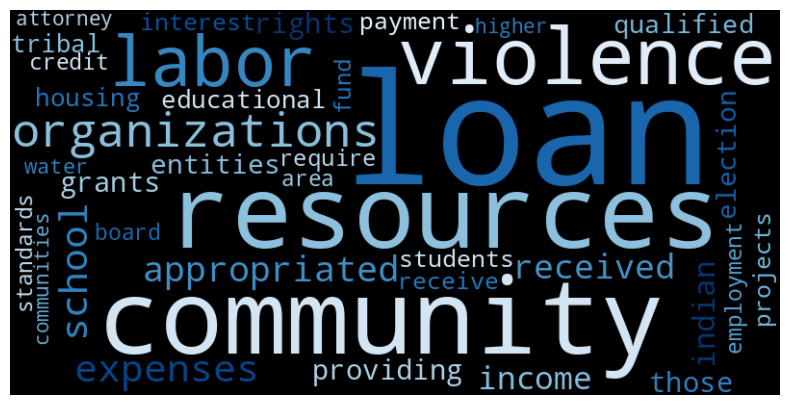

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dem_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate_from_frequencies(dem_word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(dem_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

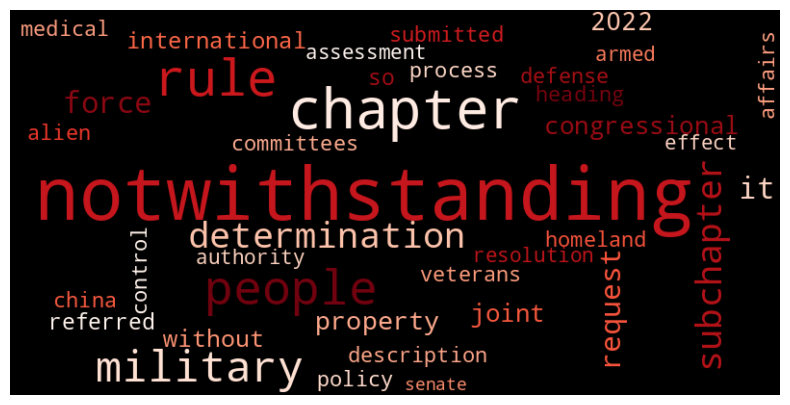

In [10]:
rep_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(rep_word_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(rep_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Visualize the lengths of text documents by party

In [12]:
import plotly.express as px
fig = px.histogram(all_bills_df, x="text_length", color="Party", title="Text Length Distribution by Party",
                   labels={"text_length": "Text Length", "Party": "Party"},
                   category_orders={"Party": ["D", "R", "I"]},
                   color_discrete_map={"D": "blue", "I": "green", "R": "red"},
                   marginal="rug",
                   barmode='group',
                   histnorm='percent')


# Set the range of the x-axis
fig.update_xaxes(range=[0, 25000])
fig.update_layout(width=1300,
                  title_font=dict(size=24),
                    legend_font=dict(size=22),
                    xaxis_tickfont=dict(size=18),
                    yaxis_tickfont=dict(size=18),
                    xaxis_title_font=dict(size=20),
                    yaxis_title_font=dict(size=20))

fig.show()

## Predicting which bills will pass using tfidf

### Training Error

In [14]:
#calculate training error

import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings("ignore")

pipeline = make_pipeline(
    make_column_transformer(
        (TfidfVectorizer(smooth_idf=False, norm=None), 'text'),
        (OneHotEncoder(), ['Party']),
        remainder ='passthrough'
    ),
    LogisticRegression()
)

scores = cross_val_score(
pipeline,
X=all_bills_df[['text', "Party"]],
y=all_bills_df["Passed"], # this is all of the training data!
scoring="neg_mean_squared_error", # higher is better for a score
cv=4)

print( np.sqrt(-1 * scores))

[0.26842342 0.20945129 0.17713584        nan]


### Test Error

In [15]:
#calculate test error
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and y is your target variable
X = all_bills_df[['text', 'Party']]  # Features (all columns except the target column)
y = all_bills_df['Passed']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

processor = ColumnTransformer(
    transformers=[
        ('Party', OneHotEncoder(handle_unknown='ignore'), ['Party']),  # Specify the column for OneHotEncoder
        ('text', TfidfVectorizer(smooth_idf=False, norm=None), 'text')  # Specify the column for TfidfVectorizer
    ])

preprocessed = processor.fit(all_bills_df)

preprocessed

warnings.filterwarnings("ignore")

pipeline_2 = make_pipeline(
    preprocessed,
    LogisticRegression()
)

pipeline_2.fit(X_train, y_train)

y_test_ = pipeline_2.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_)
conf_matrix

array([[2554,   53],
       [  26,  121]])

In [18]:
num1 = 121/(121 + 53)
num2 = 121/(121+26)
print("precision = ", num1)
print("recall = ", num2)

precision =  0.6954022988505747
recall =  0.8231292517006803
